# 📊 Projeto 3 - Análise exploratória de dados

>  Integrantes:
> * Bruno dos Santos Bezerra
> * Daniel Garcia Ribeiro
> * Hallynny Henrique Barros
> * Jaiana Santos Araújo
> * Thalles Rafael da Silva Correia
> * Youlia Kamei Saito



### 🔎 Fazer uma análise exploratória dos dados contido na base de dados do "World Happiness Report" nos anos de 2015 a 2019

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando as bases de dados
df_2015 = pd.read_csv('bases/2015.csv')
df_2016 = pd.read_csv('bases/2016.csv')
df_2017 = pd.read_csv('bases/2017.csv')
df_2018 = pd.read_csv('bases/2018.csv')
df_2019 = pd.read_csv('bases/2019.csv')

### 1. Quais foram as alterações ano a ano no ranking dos primeiros 10 países; 📆

In [3]:
# Atribui-se o top 10 de cada ano a uma variável adequada
top10_2015 = df_2015.nsmallest(10, 'Happiness Rank')['Country']
top10_2016 = df_2016.nsmallest(10, 'Happiness Rank')['Country']
top10_2017 = df_2017.nsmallest(10, 'Happiness.Rank')['Country']
top10_2018 = df_2018.nsmallest(10, 'Overall rank')['Country or region']
top10_2019 = df_2019.nsmallest(10, 'Overall rank')['Country or region']

# Cria-se um df contendo todos os top 10 organizados por colunas
top_10 = pd.DataFrame({'2015': top10_2015, '2016': top10_2016, '2017': top10_2017, '2018': top10_2018, '2019': top10_2019})
top_10.index = top_10.index + 1

# Apresenta-se a frequência de aparição de cada país nos 5 anos estudados
df_frequencia = pd.DataFrame(top_10.melt()['value'].value_counts())
df_frequencia.columns = ['Contagem de aparições']
df_frequencia = pd.merge(df_frequencia, df_2016[['Country', 'Region']], right_on = 'Country', left_index = True)
display(df_frequencia)
pd.DataFrame(df_frequencia['Region'].value_counts(normalize=True)*100).style.format('{:.2f}%')

,Contagem de aparições,Country,Region
1,5,Switzerland,Western Europe
2,5,Iceland,Western Europe
0,5,Denmark,Western Europe
3,5,Norway,Western Europe
5,5,Canada,North America
4,5,Finland,Western Europe
6,5,Netherlands,Western Europe
9,5,Sweden,Western Europe
7,5,New Zealand,Australia and New Zealand
8,4,Australia,Australia and New Zealand


,Region
Western Europe,72.73%
Australia and New Zealand,18.18%
North America,9.09%


&emsp;Baseado na tabela acima, percebe-se que o top 10 dos países com maior índice de felicidade se manteve praticamente constante, sendo que houve apenas uma troca de países. No caso, a Austrália saiu para dar lugar a Áustria no ano de 2019. \
&emsp;Além disso, observa-se que existe uma concentração de páises nesse top 10 situados na região da Europa Ocidental (72,73%), seguida pela Austrália e Nova Zelândia (18,18%) e América do Norte (9,09%).

### 2. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano (sem contar o score ou ranking)? 📆

In [4]:
# Função para trocar colunas de lugar em um dataframe
def trocar_colunas(df, coluna_1, coluna_2):
    colunas_lista = list(df.columns)
    x, y = colunas_lista.index(coluna_1), colunas_lista.index(coluna_2)
    colunas_lista[y], colunas_lista[x] = colunas_lista[x], colunas_lista[y]
    df = df[colunas_lista]

    return df

In [5]:
# Coleta de informações de interesse e padronização da nomemclatura e ordem das colunas
df_2015_numeros = df_2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df_2015_numeros['Year'] = '2015'

df_2016_numeros = df_2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual'])
df_2016_numeros['Year'] = '2016'

df_2017_numeros = df_2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df_2017_numeros = trocar_colunas(df_2017_numeros, 'Generosity', 'Trust..Government.Corruption.')                                        
df_2017_numeros.columns = ["Country",  'Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity']
df_2017_numeros['Year'] = '2017'

df_2018_numeros = df_2018.drop(columns = ['Overall rank'])
df_2018_numeros = trocar_colunas(df_2018_numeros, 'Generosity', 'Perceptions of corruption')
df_2018_numeros.columns = [ 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity']
df_2018_numeros['Year'] = '2018'

df_2019_numeros = df_2019.drop(columns = ['Overall rank'])
df_2019_numeros = trocar_colunas(df_2019_numeros, 'Generosity', 'Perceptions of corruption')
df_2019_numeros.columns = ['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity']
df_2019_numeros['Year'] = '2019'

# Agrupamento de todas as informações em um mesmo DataFrame
df_5_anos = pd.concat([df_2015_numeros, df_2016_numeros, df_2017_numeros, df_2018_numeros, df_2019_numeros], axis = 0).reset_index(drop=True)


In [6]:
# Padronização dos nomes dos países, pois alguns países possuíam nomes diferentes entre as bases de dados. Por exemplo,
# Hong Kong ora aparecia como 'Hong Kong S.A.R., China' e ora como 'Hong Kong.
correcao_nomes = {'Hong Kong S.A.R., China':'Hong Kong',
            'North Macedonia':'Macedonia',
            'North Cyprus' :'Northern Cyprus',
            'Taiwan Province of China' : 'Taiwan',
            'Somaliland region':'Somaliland Region',
            ' Northern Cyprus': 'Northern Cyprus',
            'Trinidad & Tobago': 'Trinidad and Tobago'}

df_5_anos = df_5_anos.replace(correcao_nomes)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Year,,,,,,,
2015,5.38,0.85,0.99,0.63,0.43,0.14,0.24
2016,5.38,0.95,0.79,0.56,0.37,0.14,0.24
2017,5.35,0.98,1.19,0.55,0.41,0.12,0.25
2018,5.38,0.89,1.21,0.60,0.45,0.11,0.18
2019,5.41,0.91,1.21,0.73,0.39,0.11,0.18


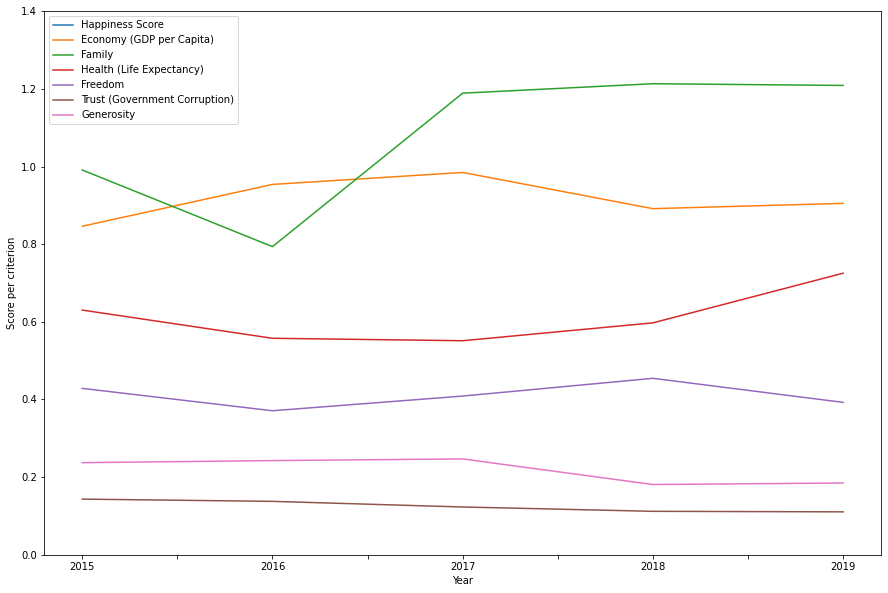

In [7]:
# Agrupa os dados por anos, apresentando as médias de cada variável
agrupado_por_ano = df_5_anos.groupby(by = 'Year')
agrupado_por_ano.mean().plot(ylim=(0,1.4), ylabel='Score per criterion', figsize=((15, 10))).legend(loc='upper left')
media_variaveis_por_ano = agrupado_por_ano.mean()
display(media_variaveis_por_ano.style.format('{:.2f}'))

In [8]:
# Função para destacar as 3 maiores variações daquela coluna
def highlight_max(s):
    is_max = abs(s).isin((s.apply(lambda x: abs(x)).nlargest(3)))
    return ['background: gray' if cell else '' for cell in is_max]

In [9]:
# Calcula as variações nominais e percentuais das médias das variáveis a cada ano e trata-se os dados faltantes
variacao = media_variaveis_por_ano.diff().dropna().iloc[:,1:]
variacao.index = ['De 2015 a 2016', 'De 2016 a 2017', 'De 2017 a 2018', 'De 2018 a 2019']
display(variacao.T.style.format('{:.3f}'))

variacao_percentual = (media_variaveis_por_ano.pct_change().dropna() * 100).iloc[:,1:]
variacao_percentual.index = ['De 2015 a 2016 [%]', 'De 2016 a 2017 [%]', 'De 2017 a 2018 [%]', 'De 2018 a 2019 [%]']
display(variacao_percentual.T.style.format('{:.2f}%').apply(highlight_max))

,De 2015 a 2016,De 2016 a 2017,De 2017 a 2018,De 2018 a 2019
Economy (GDP per Capita),0.108,0.031,-0.093,0.014
Family,-0.197,0.395,0.024,-0.004
Health (Life Expectancy),-0.073,-0.006,0.046,0.128
Freedom,-0.058,0.038,0.046,-0.062
Trust (Government Corruption),-0.006,-0.015,-0.011,-0.001
Generosity,0.005,0.004,-0.066,0.004


,De 2015 a 2016 [%],De 2016 a 2017 [%],De 2017 a 2018 [%],De 2018 a 2019 [%]
Economy (GDP per Capita),12.73%,3.23%,-9.47%,1.54%
Family,-19.92%,49.81%,2.05%,-0.36%
Health (Life Expectancy),-11.53%,-1.13%,8.34%,21.41%
Freedom,-13.44%,10.19%,11.18%,-13.63%
Trust (Government Corruption),-4.04%,-10.54%,-9.03%,-1.25%
Generosity,2.25%,1.75%,-26.68%,2.12%


In [10]:
# Apresenta-se uma análise geral das variáveis em todo período analisado
media_variaveis_por_ano.describe().drop(index=['count', '25%', '50%', '75%'], columns=['Happiness Score']).style.format('{:.2f}')

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
mean,0.92,1.08,0.61,0.41,0.13,0.22
std,0.05,0.18,0.07,0.03,0.01,0.03
min,0.85,0.79,0.55,0.37,0.11,0.18
max,0.98,1.21,0.73,0.45,0.14,0.25


&emsp;Por meio da tabela que mostra as variações percentuais, é possível observar as 3 variáveis que mais mudaram ano a ano. Assim, de 2015 a 2016, temos que as três foram: Família, Liberdade e GDP. De 2016 a 2017: Familia, Corrupção e Liberdade. De 2017 a 2018: Generosidade, Liberdade e GDP. De 2018 a 2019: Expectatva de vida, Liberdade e Generosidade. \
&emsp;Além disso, na figura acima, observa-se as médias de cada variável ao longo dos anos e, na última tabela, dados estatísticos descritivos das mesmas. Podemos também observar que a variável que mais se manteve constante foi a "Corrupção" pois possui o menor desvio padrão.

### 3. Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD do ano 2016 para 2017. ✅❌

In [11]:
# Criando outro dataframe com as variáveis de interesse e na ordem adequada
geral_GPD = df_5_anos.pivot_table(
    values = 'Economy (GDP per Capita)',
    index = ['Year'],
    columns = ['Country'],
    fill_value = np.nan,
    dropna = False,
    aggfunc = 'mean'
)

# Cria-se diversos dataframes com os top 3 positivo e negativo
variacao_GPD = geral_GPD.diff().iloc[1:,:].T
top_3_positivo_15_16 = variacao_GPD['2016'].nlargest(3)
top_3_negativo_15_16 = variacao_GPD['2016'].nsmallest(3)
top_3_positivo_16_17 = variacao_GPD['2017'].nlargest(3)
top_3_negativo_16_17 = variacao_GPD['2017'].nsmallest(3)
top_3_positivo_17_18 = variacao_GPD['2018'].nlargest(3)
top_3_negativo_17_18 = variacao_GPD['2018'].nsmallest(3)
top_3_positivo_18_19 = variacao_GPD['2019'].nlargest(3)
top_3_negativo_18_19 = variacao_GPD['2019'].nsmallest(3)

In [12]:
# Reorganiza-se os dataframes anteriores para melhor apresentação
top_3_15_16 = pd.concat([top_3_positivo_15_16.reset_index(),top_3_negativo_15_16.reset_index()],axis=1)
top_3_15_16.columns = ['Country','Greatest GPD variations','Country','Lowest GPD variations']
print('Resultados de 2015 a 2016')
display(top_3_15_16.style.format('{:.2f}', subset=['Greatest GPD variations','Lowest GPD variations']))

top_3_16_17 = pd.concat([top_3_positivo_16_17.reset_index(),top_3_negativo_16_17.reset_index()],axis=1)
top_3_16_17.columns = ['Country','Greatest GPD variations','Country','Lowest GPD variations']
print('Resultados de 2016 a 2017')
display(top_3_16_17.style.format('{:.2f}', subset=['Greatest GPD variations','Lowest GPD variations']))

top_3_17_18 = pd.concat([top_3_positivo_17_18.reset_index(),top_3_negativo_17_18.reset_index()],axis=1)
top_3_17_18.columns = ['Country','Greatest GPD variations','Country','Lowest GPD variations']
print('Resultados de 2017 a 2018')
display(top_3_17_18.style.format('{:.2f}', subset=['Greatest GPD variations','Lowest GPD variations']))

top_3_18_19 = pd.concat([top_3_positivo_18_19.reset_index(),top_3_negativo_18_19.reset_index()],axis=1)
top_3_18_19.columns = ['Country','Greatest GPD variations','Country','Lowest GPD variations']
print('Resultados de 2018 a 2019')
display(top_3_18_19.style.format('{:.2f}', subset=['Greatest GPD variations','Lowest GPD variations']))



Resultados de 2015 a 2016


,Country,Greatest GPD variations,Country,Lowest GPD variations
0,Tanzania,0.19,Libya,-0.06
1,Mongolia,0.16,Yemen,0.03
2,Mauritania,0.16,Sierra Leone,0.03


Resultados de 2016 a 2017


,Country,Greatest GPD variations,Country,Lowest GPD variations
0,Mali,0.16,Lebanon,-0.05
1,Malawi,0.15,Jordan,-0.01
2,Georgia,0.11,Venezuela,-0.01


Resultados de 2017 a 2018


,Country,Greatest GPD variations,Country,Lowest GPD variations
0,United Arab Emirates,0.47,Qatar,-0.22
1,Myanmar,0.31,United Kingdom,-0.20
2,Guinea,0.10,Jordan,-0.17


Resultados de 2018 a 2019


,Country,Greatest GPD variations,Country,Lowest GPD variations
0,United Kingdom,0.09,United Arab Emirates,-0.59
1,Malaysia,0.06,Yemen,-0.16
2,Libya,0.06,Syria,-0.07


In [13]:
# Cálculo da variação do GDP entre 2015 e 2019
variacao_GPD = geral_GPD.diff(periods = 4).iloc[4:,:].T
variacao_GPD.dropna().sort_values(by = '2019',ascending = False).iloc[[0,1,2,-3,-2,-1]].style.highlight_max(color='darkgreen').highlight_min(color='#C26161').format('{:.2f}')

Year,2019
Country,
Myanmar,0.44
Guinea,0.21
Tanzania,0.19
Venezuela,-0.08
Libya,-0.09
Yemen,-0.26


Os top 3 países que mais tiveram mudança positiva e negativa de GPD do ano 2016 para 2017 foram: \
&emsp;Maiores aumentos: Mali, Malawi e Georgia \
&emsp;Menores aumentos ou maiores diminuições: Líbano, Jordânia e Venezuela

Também são apresentados os top 3 países de ano a ano nos outros períodos e para a variação de 2015 a 2019.

### 4. Qual foi o país que mais subiu no ranking no período inteiro analisado, de 2015 para 2019. 📈

In [14]:
# Cria-se dataframes com as informações de interesse e padronima os nomes das colunas
ranking_2015 = df_2015[['Country','Happiness Rank']]
ranking_2019 = df_2019[['Country or region','Overall rank']]
ranking_2015.columns = ['Country','Happiness Rank 2015']
ranking_2019.columns = ['Country','Happiness Rank 2019']

# Une-se os dataframes para calcular as diferenças de ranking e filtra-se os primeiros colocados
ranking_2015_2019 = pd.merge(left = ranking_2015, right = ranking_2019, left_on = 'Country' , right_on = 'Country')
ranking_2015_2019['Diff'] = ranking_2015_2019['Happiness Rank 2015'] - ranking_2015_2019['Happiness Rank 2019']
melhor_resultado_ranking = ranking_2015_2019.nlargest(1, 'Diff').reset_index(drop=True)
pior_resultado_ranking = ranking_2015_2019.nsmallest(1, 'Diff').reset_index(drop=True)
print('País que mais subiu no ranking, considerando os valores de 2015 e 2019:')
display(melhor_resultado_ranking)
print('País que mais desceu no ranking, considerando os valores de 2015 e 2019:')
display(pior_resultado_ranking)

País que mais subiu no ranking, considerando os valores de 2015 e 2019:


,Country,Happiness Rank 2015,Happiness Rank 2019,Diff
0,Benin,155,102,53


País que mais desceu no ranking, considerando os valores de 2015 e 2019:


,Country,Happiness Rank 2015,Happiness Rank 2019,Diff
0,Venezuela,23,108,-85


&emsp;O pais que mais subiu no ranking no período inteiro analisado (de 2015 para 2019) foi Benin, o qual subiu 53 posições. Já a Venezuela foi o país que mais desceu nesse mesmo período, tendo caído 85 posições.

### 5. Teve países que saíram ou entraram do index. ❓

In [15]:
# Cria-se um datafram com a variável de interesse e apresenta-se os países que tiveram menos de 5 aparições,
# já que essa é a frequência máxima de aparição
entraram_ou_sairam = df_5_anos['Country'].value_counts()
pd.DataFrame(entraram_ou_sairam.where(entraram_ou_sairam < 5).dropna())

,Country
Laos,4.0
Sudan,4.0
South Sudan,4.0
Central African Republic,4.0
Lesotho,4.0
Mozambique,4.0
Namibia,4.0
Angola,4.0
Somalia,4.0
Belize,3.0


&emsp;Como um país pode ter no máximo 5 aparições no banco de dados geral, apresentamos aqueles que possuíam exatamente ou menos que 4 aparições para determinar os países que saíram ou entraram no ranking. Dessa forma, foi possível observar que 18 países entraram ou saíram do ranking entre 2015 e 2019. Ressaltamos aqui que a correção dos nomes, feita em etapa anterior, é necessária para uma avaliação correta dos países aqui mostrados.

### 6. Quais foram os 3 países que mais tiveram mudança na expectativa de vida (positiva e negativa) de 2017 para 2018. ✅❌

In [16]:
# Criando outro dataframe com as variáveis de interesse e na ordem adequada
geral_LifeExpectancy = df_5_anos.pivot_table(
    values = 'Health (Life Expectancy)',
    index = ['Year'],
    columns = ['Country'],
    fill_value = np.nan,
    dropna = False,
    aggfunc = 'mean'
)

In [17]:
# Cria-se diversos dataframes com os top 3 positivo e negativo
variacao_LifeExpectancy = geral_LifeExpectancy.diff().iloc[1:,:].T
top_3_positivo_15_16 = variacao_LifeExpectancy['2016'].nlargest(3)
top_3_negativo_15_16 = variacao_LifeExpectancy['2016'].nsmallest(3)
top_3_positivo_16_17 = variacao_LifeExpectancy['2017'].nlargest(3)
top_3_negativo_16_17 = variacao_LifeExpectancy['2017'].nsmallest(3)
top_3_positivo_17_18 = variacao_LifeExpectancy['2018'].nlargest(3)
top_3_negativo_17_18 = variacao_LifeExpectancy['2018'].nsmallest(3)
top_3_positivo_18_19 = variacao_LifeExpectancy['2019'].nlargest(3)
top_3_negativo_18_19 = variacao_LifeExpectancy['2019'].nsmallest(3)

# Reorganiza-se os dataframes anteriores para melhor apresentação
top_3_15_16 = pd.concat([top_3_positivo_15_16.reset_index(),top_3_negativo_15_16.reset_index()],axis=1)
top_3_15_16.columns = ['Country',f'Greatest life expectancy variations','Country','Lowest life expectancy variations']
print('Resultados de 2015 a 2016')
display(top_3_15_16.style.format('{:.2f}', subset=['Greatest life expectancy variations','Lowest life expectancy variations']))

top_3_16_17 = pd.concat([top_3_positivo_16_17.reset_index(),top_3_negativo_16_17.reset_index()],axis=1)
top_3_16_17.columns = ['Country',f'Greatest life expectancy variations','Country','Lowest life expectancy variations']
print('Resultados de 2016 a 2017')
display(top_3_16_17.style.format('{:.2f}', subset=['Greatest life expectancy variations','Lowest life expectancy variations']))

top_3_17_18 = pd.concat([top_3_positivo_17_18.reset_index(),top_3_negativo_17_18.reset_index()],axis=1)
top_3_17_18.columns = ['Country',f'Greatest life expectancy variations','Country','Lowest life expectancy variations']
print('Resultados de 2017 a 2018')
display(top_3_17_18.style.format('{:.2f}', subset=['Greatest life expectancy variations','Lowest life expectancy variations']))

top_3_18_19 = pd.concat([top_3_positivo_18_19.reset_index(),top_3_negativo_18_19.reset_index()],axis=1)
top_3_18_19.columns = ['Country',f'Greatest life expectancy variations','Country','Lowest life expectancy variations']
print('Resultados de 2018 a 2019')
display(top_3_18_19.style.format('{:.2f}', subset=['Greatest life expectancy variations','Lowest life expectancy variations']))

Resultados de 2015 a 2016


,Country,Greatest life expectancy variations,Country,Lowest life expectancy variations
0,Botswana,0.30,Cambodia,-0.19
1,Congo (Kinshasa),0.09,Libya,-0.18
2,Malawi,0.07,Zimbabwe,-0.18


Resultados de 2016 a 2017


,Country,Greatest life expectancy variations,Country,Lowest life expectancy variations
0,Moldova,0.07,Syria,-0.13
1,Jamaica,0.05,Russia,-0.04
2,Zimbabwe,0.04,Iceland,-0.03


Resultados de 2017 a 2018


,Country,Greatest life expectancy variations,Country,Lowest life expectancy variations
0,Angola,0.22,United Arab Emirates,-0.06
1,Kenya,0.14,Niger,-0.05
2,South Africa,0.14,Mali,-0.02


Resultados de 2018 a 2019


,Country,Greatest life expectancy variations,Country,Lowest life expectancy variations
0,Sierra Leone,0.24,Syria,-0.10
1,Burundi,0.24,Lebanon,0.03
2,Mozambique,0.22,Iraq,0.04


In [18]:
# Cálculo da variação do GDP entre 2015 e 2019
variacao_LifeExpectancy = geral_LifeExpectancy.diff(periods = 4).iloc[4:,:].T
variacao_LifeExpectancy.dropna().sort_values(by = '2019',ascending = False).iloc[[0,1,2,-3,-2,-1]].style.highlight_max(color='darkgreen').highlight_min(color='#C26161').format('{:.2f}')

Year,2019
Country,
Botswana,0.49
Mozambique,0.30
Malawi,0.27
Libya,-0.03
Swaziland,-0.08
Syria,-0.28


Os top 3 países que mais tiveram mudança positiva e negativa na expectativa de vida do ano 2017 para 2018 foram: \
&emsp;Maiores aumentos: Angola, Kenya e África do Sul \
&emsp;Menores aumentos ou maiores diminuições: Emirados Árabes Unidos, Nigéria e Mali

Também são apresentados os top 3 países de ano a ano nos outros períodos e para a variação de 2015 a 2019.

### 7. Até 2 questões extras que vocês acham interessante analisar.

#### 7.1. Quais são os indicadores que mais influenciam no índice de felicidade?

In [19]:
# Calcula-se a correlação das variáveis com o Índice de Felicidade presentes em um dataframe criado anteriormente 
pd.DataFrame(df_5_anos.corr()['Happiness Score']).sort_values('Happiness Score', ascending = False).iloc[1:].style.highlight_max(color='darkgreen').highlight_min(color='#C26161').format('{:.2f}')

,Happiness Score
Economy (GDP per Capita),0.79
Health (Life Expectancy),0.74
Family,0.65
Freedom,0.55
Trust (Government Corruption),0.40
Generosity,0.14


&emsp;As correlações entre as variáveis e o Índice de Felicidade no período de 2015 a 2019 são apresentadas na tabela acima, em que é possível observar que o GDP (economia) é o fator que mais se correlaciona com o Índice de Felicidade, ou seja, aparentemente, é o parâmetro que mais influencia na felicidade da população. Já a generosidade foi o parâmetro com menor correlação com o o Índice de Felicidade.

#### 7.1. Quais são as regiões que possuem o maior Índice de Felicidade em todo o período analisado?

In [20]:
# Cria-se um dataframe com as informações de intere-se, onde o nome de cada região é inserido por meio de um merge
media_por_pais = df_5_anos.groupby(by = 'Country').mean()
media_por_pais = pd.merge(left = media_por_pais, right = df_2016[['Country', 'Region']], on = 'Country')

# Agrupa-se os dados por região e calcula-se a média das variáveis
media_por_regiao = media_por_pais.groupby(by = 'Region').mean()
media_por_regiao = pd.DataFrame(media_por_regiao.sort_values(ascending = False, by='Happiness Score'))
media_por_regiao.style.format('{:.2f}').highlight_max(color='darkgreen').highlight_min(color='#C26161')


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Region,,,,,,,
Australia and New Zealand,7.29,1.36,1.42,0.90,0.61,0.36,0.42
North America,7.17,1.42,1.36,0.86,0.56,0.22,0.37
Western Europe,6.79,1.38,1.35,0.89,0.52,0.23,0.27
Latin America and Caribbean,6.06,0.96,1.17,0.67,0.47,0.09,0.19
Eastern Asia,5.65,1.24,1.20,0.86,0.42,0.12,0.20
Central and Eastern Europe,5.43,1.02,1.17,0.70,0.35,0.08,0.16
Southeastern Asia,5.32,0.89,1.09,0.63,0.54,0.14,0.38
Middle East and Northern Africa,5.32,1.10,0.99,0.66,0.35,0.14,0.18
Southern Asia,4.58,0.64,0.80,0.51,0.39,0.10,0.30


&emsp;A tabela acima apresenta a média de cada parâmetro ao longo de todo o período analisado para cada região/agrupamento de países. Pode-se observar que a Austrália e a Nova Zelândia é a região que possui a maior média de Felicidade, enquanto que a África Subsaariana é aquela que possui o menor valor do índice. Além disso, vê-se que tais resultados estão condizentes com os valores médias das outras variáveis. \
&emsp;Os valores médios do Índice de Felicidade são apresentados em forma de gráfico nas figuras abaixo com fins de facilitar sua visualização.

C:\Users\Daniel Garcia\AppData\Local\Temp\ipykernel_17964\155128102.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, fontsize = 13, rotation = 45, ha = 'right')
C:\Users\Daniel Garcia\AppData\Local\Temp\ipykernel_17964\155128102.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 9), fontsize = 15)


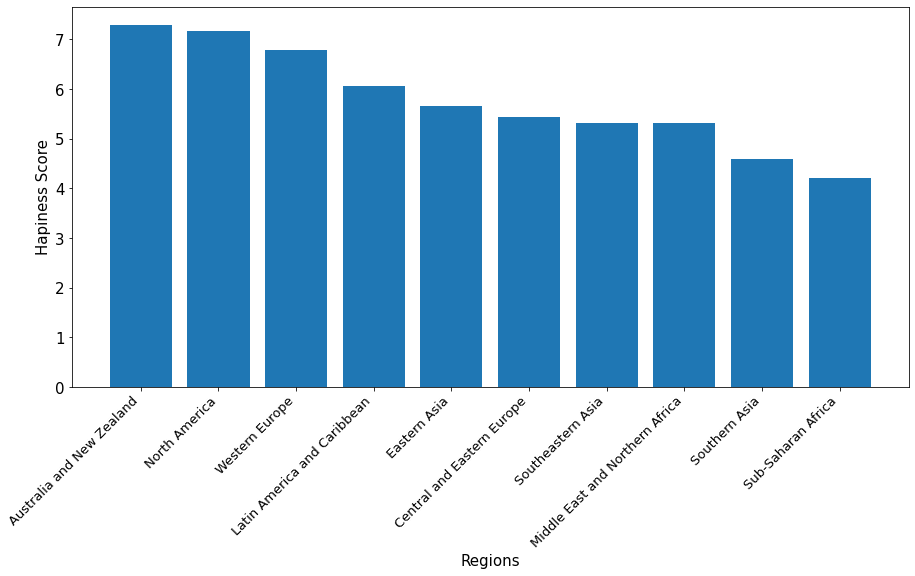

In [21]:
# Plota-se um gráfico de colunas para o Índice de Felicidade
xticklabels = list(media_por_regiao.index)
fig = plt.figure(1, figsize = (15, 7))
ax = fig.add_subplot(111)
plt.bar(x = media_por_regiao.index, height = media_por_regiao['Happiness Score'])
ax.set_xticklabels(xticklabels, fontsize = 13, rotation = 45, ha = 'right')
ax.set_yticklabels(np.arange(0, 9), fontsize = 15)
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Hapiness Score', fontsize = 15)
plt.show();

### Em seguida, gera-se um mapa com escala de cores com gradiente para as regiões de acordo com seu índice de felicidade

In [23]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

mundo = gpd.read_file('../topcoders/dados_geoespaciais/world_dis_merge.shp')

mundo = mundo.sort_values(by = 'score_hap', ascending = False)
mundo.region = media_por_regiao.index

mundo['coords'] = mundo['geometry'].apply(lambda x: x.representative_point().coords[:])
mundo['coords'] = [coords[0] for coords in mundo['coords']]

plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
ax = mundo.plot(column='score_hap', ax=ax, legend=True, cax=cax, cmap = 'Greens', edgecolor = 'gray')
ax.set_axis_off();

mundo.apply(lambda x: ax.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], ha='right', va='top',
                                  bbox = {'boxstyle': 'round, pad=0.15', 'fc': 'white', 'alpha': 0.5}), axis=1);

ModuleNotFoundError: No module named 'geopandas'